In [1]:
import pandas as pd
import numpy as np
import string
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


nltk.download('punkt')
nltk.download('punkt_tab')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/adil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/adil/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/adil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/adil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/adil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Load True and Fake datasets
true_df = pd.read_csv('/home/adil/Music/task 3 int-/archive/News _dataset/True.csv')
fake_df = pd.read_csv('/home/adil/Music/task 3 int-/archive/News _dataset/Fake.csv')


# Add labels: 1 for Real news, 0 for Fake news
true_df['label'] = 1
fake_df['label'] = 0

# Merge the datasets
df = pd.concat([true_df, fake_df], ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Keep only 'text' and 'label' columns
df = df[['text', 'label']]

# Display few rows
df.head()


,text,label
0,"Donald Trump s White House is in chaos, and th...",0
1,Now that Donald Trump is the presumptive GOP n...,0
2,Mike Pence is a huge homophobe. He supports ex...,0
3,SAN FRANCISCO (Reuters) - California Attorney ...,1
4,Twisted reasoning is all that comes from Pelos...,0


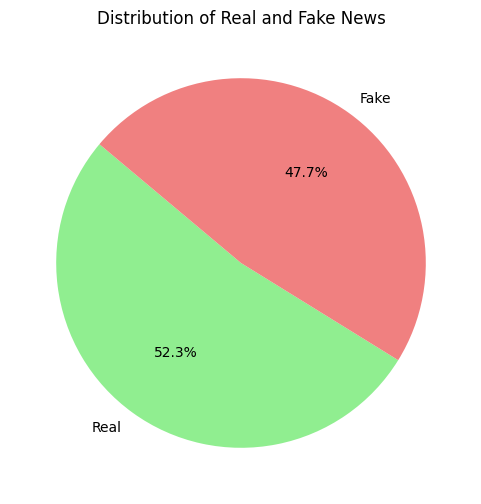

In [3]:
# Pie chart to visualize dataset balance
labels = ['Real', 'Fake']
sizes = df['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Real and Fake News')
plt.show()


In [4]:
# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase the text
    text = text.lower()
    # Remove URLs, mentions, hashtags
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
    # Remove numbers and punctuation
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and apply stemming + lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens if word not in stop_words]
    return " ".join(cleaned_tokens)


In [5]:
# Apply preprocessing to the text column
df['clean_text'] = df['text'].apply(preprocess)


In [6]:
# Split the data
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [8]:
# Initialize and train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [9]:
# Predict on test data
y_pred = model.predict(X_test_vec)

# Evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9270601336302895

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      4669
           1       0.93      0.92      0.92      4311

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980


Confusion Matrix:
 [[4370  299]
 [ 356 3955]]


In [10]:
# Function to predict new articles
def predict_news(text):
    processed_text = preprocess(text)
    vectorized_text = vectorizer.transform([processed_text])
    prediction = model.predict(vectorized_text)
    return "REAL" if prediction[0] == 1 else "FAKE"

# Example Usage
new_article = "Drinking bleach can cure COVID-19 instantly without side effects, according to a viral Facebook post."
print("Prediction:", predict_news(new_article))


Prediction: FAKE


In [11]:
import joblib

# Assuming your model and vectorizer are already trained, and variables are named `model` and `vectorizer`

# Save the trained model and vectorizer as .pkl files
joblib.dump(model, 'nb_model.pkl')  # Save the model as a .pkl file
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')  # Save the vectorizer as a .pkl file

print("Model and vectorizer saved to 'nb_model.pkl' and 'tfidf_vectorizer.pkl'")


✅ Model and vectorizer saved to 'nb_model.pkl' and 'tfidf_vectorizer.pkl'
